In [1]:
from sklearn.datasets import load_boston

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
boston = load_boston()

In [5]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [6]:
data = pd.DataFrame(boston.data)

In [7]:
#Asssign names to columns
data.columns = boston.feature_names

In [8]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
#Add field for reponse variable
data['PRICE'] = boston.target

In [10]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


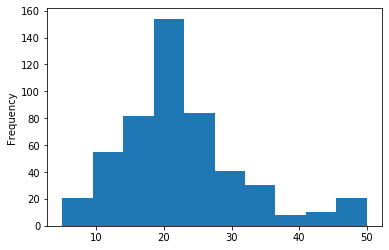

In [11]:
data['PRICE'].plot(kind = 'hist')

In [12]:
#Import XGBoost 
import xgboost as xgb

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
#Separate features from response field
X, y = data.iloc[:,:-1], data.iloc[:,-1]

In [15]:
#Create DMatrix for Cross Validation
data_dmatrix = xgb.DMatrix(data=X, label=y)

In [16]:
#Partition dataset
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state= 123)

In [18]:
from sklearn.ensemble import RandomForestRegressor 

In [19]:
rf = RandomForestRegressor(n_estimators = 400, min_samples_leaf=0.12, random_state=123)

In [20]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.12, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=False, random_state=123, verbose=0,
                      warm_start=False)

In [21]:
rf_pred = rf.predict(X_test)
rf_pred2 = rf.predict(X_train)

In [22]:
rmse_test = mean_squared_error(y_test, rf_pred)**(1/2)
rmse_train = mean_squared_error(y_train, rf_pred2)**(1/2)

In [23]:
print("Test set RMSE: %f " % (rmse_test))
print("Train set RMSE: %f " % (rmse_train))

Test set RMSE: 5.478919 
Train set RMSE: 5.100675 


In [24]:
rf_params = {'max_depth': [3,4,5,6],'min_samples_leaf':[0.04,0.06,0.08], 'max_features':[0.2,0.4,0.6,0.8]}

In [25]:
from sklearn.model_selection import GridSearchCV
grid_rf = GridSearchCV(estimator = rf,
                     param_grid = rf_params,
                     cv=10,
                     scoring='neg_mean_squared_error',
                     verbose=1)

In [26]:
grid_rf.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  3.5min finished
C:\Users\leojames\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=0.12,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=400, n_jobs=None,
                                             oob_score=False, random_state=123,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6],
    

In [27]:
print('Best parameters found for rf: ', grid_rf.best_params_)
print('Lowerst RMSE found for rf: ', np.sqrt(np.sqrt(np.abs(grid_rf.best_score_))))

Best parameters found for rf:  {'max_depth': 6, 'max_features': 0.8, 'min_samples_leaf': 0.04}
Lowerst RMSE found for rf:  2.003765003536373


In [28]:
#Test this model on unseen data. First, list attributes
list(X.columns)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [29]:
#Take a look at the data to help formulate an example observation
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [30]:
#Create new 'scenario' array 
new = np.array([0.04, 10, 20, 0.01, 0.4, 5, 40, 3, 10, 380, 20, 300, 9])

In [31]:
#Check new observation 
print(new)

[4.0e-02 1.0e+01 2.0e+01 1.0e-02 4.0e-01 5.0e+00 4.0e+01 3.0e+00 1.0e+01
 3.8e+02 2.0e+01 3.0e+02 9.0e+00]


In [32]:
#Make sure that the array has 13 features and 1 observation
new.shape

(13,)

In [33]:
new_obs_final = new.reshape(1,-1)

In [34]:
new_obs_final.shape

(1, 13)

In [35]:
#Predict price for new values
grid_rf.predict(new_obs_final)

array([22.86198006])

In [36]:
#Most important features for model variance
pd.Series(rf.feature_importances_, index = X.columns).sort_values(ascending = False)

LSTAT      0.628125
RM         0.361297
DIS        0.007148
CRIM       0.002207
NOX        0.000663
PTRATIO    0.000517
TAX        0.000044
B          0.000000
RAD        0.000000
AGE        0.000000
CHAS       0.000000
INDUS      0.000000
ZN         0.000000
dtype: float64

In [37]:
#Let's attempt an XGBoost Regressor to see if we can get a better performance
xg_reg = xgb.XGBRegressor(objective = 'reg:linear', colsample_bytree= 0.3, learning_rate = 0.1,
                            max_depth = 5, alpha = 10, n_estimators = 10)

In [38]:
xg_reg.fit(X_train, y_train)

[13:38:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [39]:
preds = xg_reg.predict(X_test)
preds2 = xg_reg.predict(X_train)

In [40]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
rmse2 = np.sqrt(mean_squared_error(y_train, preds2))
print("Attmept 1 Test RMSE: %f" % (rmse))
print("Attempt 1 Train RMSE: %f" % (rmse2))

Attmept 1 Test RMSE: 10.170035
Attempt 1 Train RMSE: 9.470643


In [41]:
#Add cross validation to yield better performance. First, create params dictionary
params = {'objective':'reg:linear', 'colsample_bytree':0.3, 'learning_rate':0.1, 'maz_depth':5,
         'alpha':10}

In [42]:
#Now cross validate
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold = 3, num_boost_round=50, early_stopping_rounds=10,
                   metrics="rmse", as_pandas=True,seed=123)

[13:38:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [43]:
#Review output of results
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.750760,0.036149,21.765523,0.028850
1,19.778533,0.077649,19.830758,0.031761
2,18.052812,0.118632,18.157338,0.116036
3,16.458958,0.169187,16.623974,0.191413
4,15.074781,0.183547,15.254608,0.213611


In [44]:
#Review cross validated results
print((cv_results['test-rmse-mean']).tail(1))
print((cv_results['train-rmse-mean']).tail(1))

49    4.04131
Name: test-rmse-mean, dtype: float64
49    2.194131
Name: train-rmse-mean, dtype: float64


In [45]:
#Although better, let's add grid search to find best parameters. First, define parameters
gbm_param_grid = {'learning rate': [0.01, 0.1, 0.5, 0.9], 'n_estimators': [200], 'subsample':[0.3,0.5,0.9]}

In [46]:
#Second, initialize model and run cross validation on initialized estimator
gbm = xgb.XGBRegressor()
grid_mse = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid, scoring='neg_mean_squared_error', cv=4, verbose=1)

In [47]:
#Third, fit cross validated model
grid_mse.fit(X, y)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
[13:38:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[13:38:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:56] WARNI

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    5.3s finished
C:\Users\leojames\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning rate': [0.01, 0.1, 0.5, 0.9],
                         'n_estimators': [200], 'subsampl

In [48]:
#Print best performing parameters and their RMSE scores
print('Best parameters found: ', grid_mse.best_params_)
print('Lowerst RMSE found: ', np.sqrt(np.sqrt(np.abs(grid_mse.best_score_))))

Best parameters found:  {'learning rate': 0.01, 'n_estimators': 200, 'subsample': 0.9}
Lowerst RMSE found:  2.088895723129293


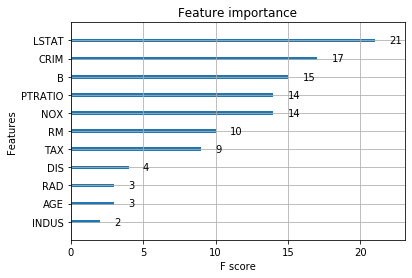

In [49]:
#Feature importance vizualized
xgb.plot_importance(xg_reg)